# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
#Business problem:Retirement homes. Latent value analysis? (Something that is hidden or overlooked and may be realized at a later time)
#People can use these homes to rent out at first and then live in it later when they want
#Look into different geographic regions. Dan:West Coast, Henry:Central, Milad:East Coast

In [3]:
#Step 4 uses this method in it's sample function melt_data()
#pd.melt()

In [4]:
import pandas as pd
df_raw = pd.read_csv("zillow_data.csv")
df_raw.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
#RegionName is also the zipcode, changing the column name
df_raw.rename(columns={'RegionName':'Zipcode'}, inplace = True)


In [7]:
#Merging Milad's Zipcode csv with df_raw
df_zip = pd.read_csv('zip_code_database.csv')
df_zip.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787,939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787,939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787,NaN,US,18.43,-67.15,0


In [8]:
df_zip.columns
#dropping the columns we don't need. 
#type, decommissioned, primary_city, acceptable_cities, unacceptable_ci timezone, 
#area_codes, world_region, country, irs_estimated_population

Index(['zip', 'type', 'decommissioned', 'primary_city', 'acceptable_cities',
       'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes',
       'world_region', 'country', 'latitude', 'longitude',
       'irs_estimated_population'],
      dtype='object')

In [9]:
df_zip.drop(columns = ["type", "decommissioned", "primary_city", 
                       "acceptable_cities", "unacceptable_cities","timezone", "area_codes", 
                       "world_region", "country", "state", "county"], inplace = True )
df_zip

,zip,latitude,longitude,irs_estimated_population
0,501,40.81,-73.04,562
1,544,40.81,-73.04,0
2,601,18.16,-66.72,0
3,602,18.38,-67.18,0
4,603,18.43,-67.15,0
...,...,...,...,...
42730,99926,55.14,-131.49,1140
42731,99927,56.30,-133.57,48
42732,99928,55.45,-131.79,1530
42733,99929,56.41,-131.61,2145


In [10]:
#renaming zip column to zipcode
df_zip.rename(columns = {'zip':'Zipcode'}, inplace = True)
df_zip

,Zipcode,latitude,longitude,irs_estimated_population
0,501,40.81,-73.04,562
1,544,40.81,-73.04,0
2,601,18.16,-66.72,0
3,602,18.38,-67.18,0
4,603,18.43,-67.15,0
...,...,...,...,...
42730,99926,55.14,-131.49,1140
42731,99927,56.30,-133.57,48
42732,99928,55.45,-131.79,1530
42733,99929,56.41,-131.61,2145


In [11]:
#merging the two dataframes on the zipcode columns into the master df
#We see we have 14,723 total unique zipcodes
df = df_raw.merge(df_zip, on = 'Zipcode')
df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,latitude,longitude,irs_estimated_population
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1009600,1013300,1018700,1024400,1030700,1033800,1030600,41.94,-87.65,54760
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,314100,315000,316600,318100,319600,321100,321800,33.17,-96.70,56810
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320800,321200,321200,323000,326900,329900,29.74,-95.83,125330
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,41.92,-87.65,52800
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120300,120500,121000,121500,31.78,-106.30,99590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218500,218100,216400,213100,209800,209200,209300,42.57,-72.82,200
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,215200,214300,213100,213700,218300,222700,225800,43.97,-71.68,189
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,126700,128800,130600,131700,132500,133000,133400,37.57,-84.29,306
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,695600,695500,694700,706400,705300,681500,664400,38.95,-106.90,156


# Step 2: Data Preprocessing

In [12]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
                                           #telling which columns needs to be converted. columns 8 through 3rd to last
    return pd.to_datetime(df.columns.values[7:-3], format='%Y-%m')

In [13]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [14]:
df.info

<bound method DataFrame.info of        RegionID  Zipcode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-10  \
0    

# Step 3: EDA and Visualization

In [15]:
import matplotlib


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [33]:
#Binning our zipcodes into East, Central, West United States
df_East = df[df.Zipcode < 50000]
df_Central = df[(df.Zipcode >= 50000) & (df.Zipcode < 80000) ]
df_West = df[(df.Zipcode >= 80000)]

In [35]:
df_Central.shape

(3684, 275)

In [36]:
df_Central.isnull().sum()

RegionID                      0
Zipcode                       0
City                          0
State                         0
Metro                       390
                           ... 
2018-03                       0
2018-04                       0
latitude                      0
longitude                     0
irs_estimated_population      0
Length: 275, dtype: int64

In [37]:
 df_Central.isnull().sum().sum()

59097

In [38]:
df_Central.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,latitude,longitude,irs_estimated_population
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1009600,1013300,1018700,1024400,1030700,1033800,1030600,41.94,-87.65,54760
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,314100,315000,316600,318100,319600,321100,321800,33.17,-96.70,56810
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320800,321200,321200,323000,326900,329900,29.74,-95.83,125330
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,41.92,-87.65,52800
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120300,120500,121000,121500,31.78,-106.30,99590


In [66]:
df_Texas = df[(df.Zipcode >= 75000) & (df.Zipcode < 80000)]

In [118]:
df_Texas.shape

(989, 277)

In [77]:
df_Texas.isnull().sum().sum()

7110

In [137]:
df_Texas.Metro.unique()


array(['Dallas-Fort Worth', 'Houston', 'El Paso', 'Austin', 'McAllen',
       'San Antonio', 'Brownsville', 'College Station', 'Lubbock',
       'Amarillo', 'Laredo', 'Tyler', 'Killeen', 'Kerrville', 'Del Rio',
       'Midland', 'Victoria', 'Corpus Christi', 'Odessa', 'Eagle Pass',
       'San Angelo', 'Beaumont', 'Texarkana', 'Waco', 'Lufkin',
       'Huntsville', nan, 'Abilene', 'Rio Grande City', 'Stephenville',
       'Kingsville', 'Brenham', 'Corsicana', 'Fredericksburg',
       'Gainesville', 'Jacksonville', 'Brownwood', 'Alice', 'Bay City',
       'Mount Pleasant', 'Longview', 'Wichita Falls', 'Plainview',
       'Nacogdoches', 'Beeville', 'Pampa', 'Mineral Wells', 'Athens',
       'Uvalde', 'Port Lavaca', 'Marshall', 'Levelland', 'El Campo',
       'Palestine', 'Hereford', 'Dumas', 'Sweetwater', 'Vernon', 'Paris',
       'Lamesa', 'Borger'], dtype=object)

In [73]:
## 5 year ROI
df_Texas['ROI_5yr'] = round((df_Texas['2018-04'] - df_Texas['2013-01'])/ df_Texas['2013-01'],4)
## 3 year ROI, this metric should be the metric used
df_Texas['ROI_3yr'] = round((df_Texas['2018-04'] - df_Texas['2015-01'])/ df_Texas['2015-01'],4)

<ipython-input-73-d591cc5967a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Texas['ROI_5yr'] = round((df_Texas['2018-04'] - df_Texas['2013-01'])/ df_Texas['2013-01'],4)
<ipython-input-73-d591cc5967a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Texas['ROI_3yr'] = round((df_Texas['2018-04'] - df_Texas['2015-01'])/ df_Texas['2015-01'],4)


In [74]:
df_Texas['ROI_5yr']

1        0.5629
2        0.2842
4        0.0752
5        0.4617
8        0.5021
          ...  
14372    0.3602
14472    0.2635
14492    0.3811
14599    0.4282
14695    0.3200
Name: ROI_5yr, Length: 989, dtype: float64

In [75]:
df_Texas['ROI_3yr']

1        0.2800
2        0.0935
4        0.0593
5        0.1932
8        0.2496
          ...  
14372    0.2028
14472    0.1488
14492    0.1529
14599    0.2579
14695    0.1115
Name: ROI_3yr, Length: 989, dtype: float64

In [76]:
df_Texas.info

<bound method DataFrame.info of        RegionID  Zipcode           City State              Metro CountyName  \
1         90668    75070       McKinney    TX  Dallas-Fort Worth     Collin   
2         91982    77494           Katy    TX            Houston     Harris   
4         93144    79936        El Paso    TX            El Paso    El Paso   
5         91733    77084        Houston    TX            Houston     Harris   
8         91940    77449           Katy    TX            Houston     Harris   
...         ...      ...            ...   ...                ...        ...   
14372     91640    76941        Mertzon    TX         San Angelo      Irion   
14472     92897    79313          Anton    TX          Levelland    Hockley   
14492     92921    79355         Plains    TX                NaN     Yoakum   
14599     92929    79366  Ransom Canyon    TX            Lubbock    Lubbock   
14695     91948    77457      Matagorda    TX           Bay City  Matagorda   

       SizeRank   1

In [78]:
df_Texas.head

<bound method NDFrame.head of        RegionID  Zipcode           City State              Metro CountyName  \
1         90668    75070       McKinney    TX  Dallas-Fort Worth     Collin   
2         91982    77494           Katy    TX            Houston     Harris   
4         93144    79936        El Paso    TX            El Paso    El Paso   
5         91733    77084        Houston    TX            Houston     Harris   
8         91940    77449           Katy    TX            Houston     Harris   
...         ...      ...            ...   ...                ...        ...   
14372     91640    76941        Mertzon    TX         San Angelo      Irion   
14472     92897    79313          Anton    TX          Levelland    Hockley   
14492     92921    79355         Plains    TX                NaN     Yoakum   
14599     92929    79366  Ransom Canyon    TX            Lubbock    Lubbock   
14695     91948    77457      Matagorda    TX           Bay City  Matagorda   

       SizeRank   199

In [79]:
type(df_Texas)

pandas.core.frame.DataFrame

# Step 4: Reshape from Wide to Long Format

In [155]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['Zipcode', 'RegionID', 'SizeRank', 'City', 'State', 
                                  'Metro', 'CountyName','latitude', 'longitude', 'irs_estimated_population','ROI_5yr', 'ROI_3yr']
                                 , var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted #.groupby('time').aggregate({'value':'mean'}) 

In [156]:
melted_df_Texas = melt_data(df_Texas)
melted_df_Texas.shape

(255096, 14)

In [157]:
melted_df_Texas

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,Date,value
0,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,33.17,-96.70,56810,0.5629,0.2800,1996-04-01,235700.0
1,77494,91982,3,Katy,TX,Houston,Harris,29.74,-95.83,125330,0.2842,0.0935,1996-04-01,210400.0
2,79936,93144,5,El Paso,TX,El Paso,El Paso,31.78,-106.30,99590,0.0752,0.0593,1996-04-01,77300.0
3,77084,91733,6,Houston,TX,Houston,Harris,29.83,-95.66,99740,0.4617,0.1932,1996-04-01,95000.0
4,77449,91940,9,Katy,TX,Houston,Harris,29.84,-95.73,119990,0.5021,0.2496,1996-04-01,95400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262080,76941,91640,14373,Mertzon,TX,San Angelo,Irion,31.26,-100.82,1320,0.3602,0.2028,2018-04-01,121600.0
262081,79313,92897,14473,Anton,TX,Levelland,Hockley,33.81,-102.16,1260,0.2635,0.1488,2018-04-01,63300.0
262082,79355,92921,14493,Plains,TX,NaN,Yoakum,33.19,-102.82,1850,0.3811,0.1529,2018-04-01,93500.0
262083,79366,92929,14600,Ransom Canyon,TX,Lubbock,Lubbock,33.53,-101.69,1120,0.4282,0.2579,2018-04-01,257500.0


In [158]:
melted_df_Texas.isna().value_counts()

Zipcode  RegionID  SizeRank  City   State  Metro  CountyName  latitude  longitude  irs_estimated_population  ROI_5yr  ROI_3yr  Date   value
False    False     False     False  False  False  False       False     False      False                     False    False    False  False    226832
                                           True   False       False     False      False                     False    False    False  False     27992
                                           False  False       False     False      False                     True     False    False  False       272
dtype: int64

In [160]:
#Change Zipcode dtype to 'str'
melted_df_Texas['Zipcode'] = melted_df_Texas['Zipcode'].astype(str)

# Make sure the data type of the 'Date' column is datetime
melted_df_Texas['Date'] = pd.to_datetime(melted_df_Texas['Date'], format='%m/%y')

# Set the 'Date' column as index
melted_df_Texas.set_index('Date', inplace=True)

In [161]:
melted_df_Texas.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=255096, freq=None)

We have our home values by month from 04/1996 to 04/2018, a 22 year period. We can choose to use all 22 years or splice it by 01/2008 when the Housing Bubble happened. 01/2008 to 04/2018 would give a 10 year window. 

In [162]:
melted_df_Texas_10yr = melted_df_Texas['2008-01-01':'2018-04-01']

In [163]:
#'MS' means Month start frequency
melted_df_Texas_10yr.resample('MS').mean().index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=124, freq='MS')

In [164]:
#Some of our Metro data is missing. 
#Maybe that zipcode is just a small populated town/towns in Texas not big enough to be considered in a Metro. 
melted_df_Texas_10yr.info()
melted_df_Texas_10yr.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121500 entries, 2008-01-01 to 2018-04-01
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Zipcode                   121500 non-null  object 
 1   RegionID                  121500 non-null  int64  
 2   SizeRank                  121500 non-null  int64  
 3   City                      121500 non-null  object 
 4   State                     121500 non-null  object 
 5   Metro                     107608 non-null  object 
 6   CountyName                121500 non-null  object 
 7   latitude                  121500 non-null  float64
 8   longitude                 121500 non-null  float64
 9   irs_estimated_population  121500 non-null  int64  
 10  ROI_5yr                   121228 non-null  float64
 11  ROI_3yr                   121500 non-null  float64
 12  value                     121500 non-null  float64
dtypes: float64(5), int64(3), obj

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,33.17,-96.70,56810,0.5629,0.2800,213900.0
2008-01-01,77494,91982,3,Katy,TX,Houston,Harris,29.74,-95.83,125330,0.2842,0.0935,254100.0
2008-01-01,79936,93144,5,El Paso,TX,El Paso,El Paso,31.78,-106.30,99590,0.0752,0.0593,131200.0
2008-01-01,77084,91733,6,Houston,TX,Houston,Harris,29.83,-95.66,99740,0.4617,0.1932,131500.0
2008-01-01,77449,91940,9,Katy,TX,Houston,Harris,29.84,-95.73,119990,0.5021,0.2496,136500.0


In [165]:
#We see Plains TX is an example of NaN Metro name. It only had 1,481 population. 
melted_df_Texas_10yr.tail()

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2018-04-01,76941,91640,14373,Mertzon,TX,San Angelo,Irion,31.26,-100.82,1320,0.3602,0.2028,121600.0
2018-04-01,79313,92897,14473,Anton,TX,Levelland,Hockley,33.81,-102.16,1260,0.2635,0.1488,63300.0
2018-04-01,79355,92921,14493,Plains,TX,NaN,Yoakum,33.19,-102.82,1850,0.3811,0.1529,93500.0
2018-04-01,79366,92929,14600,Ransom Canyon,TX,Lubbock,Lubbock,33.53,-101.69,1120,0.4282,0.2579,257500.0
2018-04-01,77457,91948,14696,Matagorda,TX,Bay City,Matagorda,28.73,-95.88,457,0.3200,0.1115,227300.0


## Metro EDA

In [166]:
metro_grp = melted_df_Texas_10yr.groupby('Metro')
metro_grp = metro_grp.value.mean()
metro_grp = metro_grp.sort_values(ascending=False).head(10)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

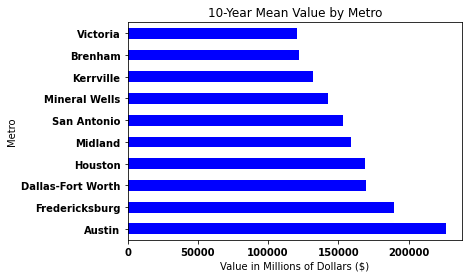

In [125]:
import matplotlib.pyplot as plt

metro_grp.plot.barh(color='blue')
plt.title('10-Year Mean Value by Metro')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()


In [ ]:
#The list of the Texas Metro's
(['Dallas-Fort Worth', 'Houston', 'El Paso', 'Austin', 'McAllen',
       'San Antonio', 'Brownsville', 'College Station', 'Lubbock',
       'Amarillo', 'Laredo', 'Tyler', 'Killeen', 'Kerrville', 'Del Rio',
       'Midland', 'Victoria', 'Corpus Christi', 'Odessa', 'Eagle Pass',
       'San Angelo', 'Beaumont', 'Texarkana', 'Waco', 'Lufkin',
       'Huntsville', nan, 'Abilene', 'Rio Grande City', 'Stephenville',
       'Kingsville', 'Brenham', 'Corsicana', 'Fredericksburg',
       'Gainesville', 'Jacksonville', 'Brownwood', 'Alice', 'Bay City',
       'Mount Pleasant', 'Longview', 'Wichita Falls', 'Plainview',
       'Nacogdoches', 'Beeville', 'Pampa', 'Mineral Wells', 'Athens',
       'Uvalde', 'Port Lavaca', 'Marshall', 'Levelland', 'El Campo',
       'Palestine', 'Hereford', 'Dumas', 'Sweetwater', 'Vernon', 'Paris',
       'Lamesa', 'Borger'], dtype=object)

In [167]:
#Let's Take a Closer look at these Texas Metro's
#columns to note are ROI_5yr, ROI_3yr, value
#Maybe drop all the other columns? Maybe keep them for other possible EDA

#Austin
austin = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='Austin']
austin.describe(include = [float])

#We see that Austin has 19165 counts and mean .51% ROI (5-year) and .29% ROI (3-year) and mean value 227k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000
mean,30.298630,-97.738493,0.511408,0.294360,254584.710561
std,0.207404,0.189260,0.152580,0.112624,133087.885281
min,29.680000,-98.160000,0.183700,0.076200,71500.000000
25%,30.180000,-97.860000,0.422600,0.224700,152600.000000
50%,30.310000,-97.740000,0.498300,0.276000,215450.000000
75%,30.430000,-97.670000,0.577500,0.371800,318325.000000
max,30.710000,-97.110000,1.098500,0.563900,921200.000000


In [168]:
#Fredericksburg

fredericksburg = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='Fredericksburg']
fredericksburg.describe(include = [float])

#We see that Fredericksburg has 265 counts and mean .44% ROI (5-year) and .26% ROI (3-year) and mean value 190k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,1.240000e+02,124.00,1.240000e+02,1.240000e+02,124.000000
mean,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,218608.064516
std,7.134253e-15,0.00,1.114727e-16,1.114727e-16,25990.203272
min,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,193200.000000
25%,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,198875.000000
50%,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,206800.000000
75%,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,236375.000000
max,3.027000e+01,-98.87,4.402000e-01,2.630000e-01,284300.000000


In [169]:
#Dallas-Fort Worth

dfw = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='Dallas-Fort Worth']
dfw.describe(include = [float])

#Dallas-Fort Worth has 56,239 counts and mean .57% ROI (5-year) and .41% ROI (3-year) and mean value 169k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,26806.000000,26806.000000,26754.000000,26806.000000,2.680600e+04
mean,32.864535,-96.964466,0.575023,0.412221,1.859463e+05
std,0.236454,0.361833,0.176621,0.147883,1.190200e+05
min,32.230000,-97.790000,0.148600,0.114300,5.110000e+04
25%,32.710000,-97.210000,0.467100,0.304900,1.163000e+05
50%,32.860000,-96.960000,0.551600,0.388600,1.564000e+05
75%,33.030000,-96.740000,0.704400,0.488900,2.207000e+05
max,33.390000,-95.900000,1.072400,0.831900,1.268600e+06


In [170]:
#Houston

houston = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='Houston']
houston.describe(include = [float])

#Houston has 49,555 counts and mean .44% ROI (5y) and .26% ROI (3y) and mean value 168k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,23188.000000,23188.000000,23188.000000,23188.000000,2.318800e+04
mean,29.761711,-95.385401,0.449578,0.265674,1.867233e+05
std,0.270427,0.256379,0.111630,0.129322,1.325177e+05
min,28.950000,-96.250000,0.178200,0.008100,5.790000e+04
25%,29.620000,-95.530000,0.370700,0.179700,1.095750e+05
50%,29.750000,-95.420000,0.437200,0.258200,1.476000e+05
75%,29.920000,-95.230000,0.525200,0.341800,2.105000e+05
max,30.440000,-94.380000,0.784000,0.703600,1.065600e+06


In [171]:
#Midland

midland = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='Midland']
midland.describe(include = [float])

#Midland has 1060 counts and mean .29% (5y), .09%(3y), mean value of 158k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,496.000000,496.00000,496.000000,496.000000,496.000000
mean,31.975000,-102.11000,0.290425,0.087850,191771.572581
std,0.076399,0.06826,0.098245,0.042843,49268.699863
min,31.850000,-102.20000,0.201100,0.033700,104400.000000
25%,31.947500,-102.14750,0.203275,0.068800,150475.000000
50%,32.000000,-102.11500,0.260250,0.082050,193700.000000
75%,32.027500,-102.07750,0.347400,0.101100,236325.000000
max,32.050000,-102.01000,0.440100,0.153600,289800.000000


In [172]:
#San Antonio

sa = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Metro']=='San Antonio']
sa.describe(include = [float])

#San Antonio has 20,670 counts, .38% (5yr) and .27% (3yr) and mean value 153k

,latitude,longitude,ROI_5yr,ROI_3yr,value
count,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000
mean,29.509231,-98.487308,0.382228,0.270814,175724.110835
std,0.178958,0.230417,0.152545,0.141924,96526.150707
min,29.070000,-99.150000,0.097300,-0.028000,53700.000000
25%,29.390000,-98.620000,0.297500,0.186500,96200.000000
50%,29.515000,-98.490000,0.357450,0.235050,151250.000000
75%,29.590000,-98.360000,0.457800,0.342400,237775.000000
max,29.970000,-97.960000,0.881000,0.720500,614600.000000


In [173]:
#As per SizeRank values seen below, our data includes very densely populated, somewhat populated, 
#and also some of the least populated zipcodes in Texas.
melted_df_Texas_10yr.SizeRank.unique()

array([    2,     3,     5,     6,     9,    19,    23,    24,    26,
          27,    32,    33,    35,    39,    42,    45,    46,    53,
          55,    62,    64,    67,    69,    70,    72,    78,    82,
          99,   114,   124,   137,   145,   154,   164,   171,   176,
         179,   183,   185,   211,   226,   265,   278,   280,   284,
         289,   305,   313,   322,   336,   343,   376,   388,   389,
         404,   406,   423,   432,   433,   450,   487,   491,   503,
         508,   512,   515,   530,   534,   535,   551,   552,   563,
         595,   596,   603,   614,   630,   634,   637,   640,   643,
         646,   653,   655,   677,   702,   706,   721,   731,   742,
         756,   757,   758,   759,   760,   774,   784,   786,   792,
         794,   817,   818,   819,   820,   821,   826,   847,   856,
         873,   876,   896,   903,   920,   927,   932,   937,   945,
         978,   987,   996,  1015,  1019,  1022,  1029,  1036,  1042,
        1052,  1055,

In [174]:
print('10 year average TX home value' ,round(melted_df_Texas_10yr['value'].mean(), 2))

10 year average TX home value 155758.88


In [175]:
melted_df_Texas_10yr['value'].describe()

count    1.215000e+05
mean     1.557589e+05
std      1.079595e+05
min      2.600000e+04
25%      8.790000e+04
50%      1.271000e+05
75%      1.835000e+05
max      1.268600e+06
Name: value, dtype: float64

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

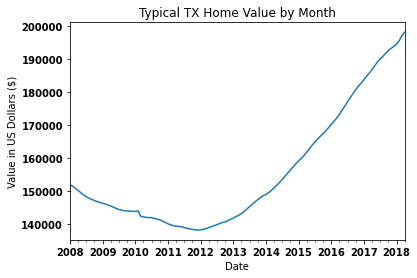

In [179]:
monthly_data = melted_df_Texas_10yr.resample('MS').mean()['value']
monthly_data.plot()
plt.title('Typical TX Home Value by Month')
plt.ylabel('Value in US Dollars ($)')
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

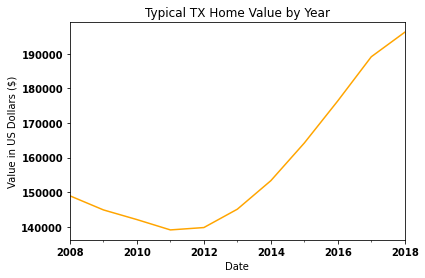

In [181]:
#Let's resample by year to see a clearer visual

yearly_data = melted_df_Texas_10yr['value'].resample(rule='A').mean()
yearly_data.plot.line(color='orange')
plt.title('Typical TX Home Value by Year')
plt.ylabel('Value in US Dollars ($)')
plt.savefig('typical-home-value-year')
plt.show()

## Zipcodes & Metros

In [184]:
zipcode_grp = melted_df_Texas_10yr.groupby('Zipcode')
zipcode_grp.head()

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,33.17,-96.70,56810,0.5629,0.2800,213900.0
2008-01-01,77494,91982,3,Katy,TX,Houston,Harris,29.74,-95.83,125330,0.2842,0.0935,254100.0
2008-01-01,79936,93144,5,El Paso,TX,El Paso,El Paso,31.78,-106.30,99590,0.0752,0.0593,131200.0
2008-01-01,77084,91733,6,Houston,TX,Houston,Harris,29.83,-95.66,99740,0.4617,0.1932,131500.0
2008-01-01,77449,91940,9,Katy,TX,Houston,Harris,29.84,-95.73,119990,0.5021,0.2496,136500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-01,75941,91143,9452,Diboll,TX,Lufkin,Angelina,31.18,-94.78,7010,NaN,0.1376,75400.0
2014-04-01,78593,92534,11823,Santa Rosa,TX,Brownsville,Cameron,26.25,-97.82,4850,NaN,0.3841,51700.0
2014-05-01,75210,90763,9357,Dallas,TX,Dallas-Fort Worth,Dallas,32.77,-96.75,6110,NaN,0.4952,57100.0


Now, we'll plot the  Top 10 Zipcodes with the highest mean value between 2008 and 2018.

In [185]:
mean_value = zipcode_grp.value.mean()
mean_value = mean_value.sort_values(ascending=False).head(10)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

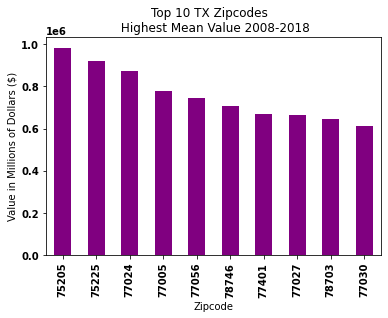

<Figure size 432x288 with 0 Axes>

In [188]:
mean_value.plot.bar(color= 'purple')
plt.title('Top 10 TX Zipcodes  \n Highest Mean Value 2008-2018')
plt.ylabel('Value in Millions of Dollars ($)')
plt.show()
plt.savefig('Zipcodes')

Let's find our zipcode with the highest mean value.

In [189]:
#75205 is DFW metro and city is University Park
melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Zipcode']=='75205']

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,940400.0
2008-02-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,933000.0
2008-03-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,924000.0
2008-04-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,915100.0
2008-05-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,907800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,1245900.0
2018-01-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,1250200.0
2018-02-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,1258300.0


second highest zipcode mean value

In [191]:
#City of Dallas
melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Zipcode']=='75225']

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,812900.0
2008-02-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,807300.0
2008-03-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,801500.0
2008-04-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,796800.0
2008-05-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,792800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1043500.0
2018-01-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1044700.0
2018-02-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1049300.0


In [192]:
#City of Houston is third highest zipcode mean
melted_df_Texas_10yr.loc[melted_df_Texas_10yr['Zipcode']=='77024']

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,812900.0
2008-02-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,807300.0
2008-03-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,801500.0
2008-04-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,796800.0
2008-05-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,792800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1043500.0
2018-01-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1044700.0
2018-02-01,77024,91673,1370,Houston,TX,Houston,Harris,29.77,-95.51,36710,0.3221,0.1383,1049300.0


In [193]:
melted_df_Texas_10yr.value.describe()

count    1.215000e+05
mean     1.557589e+05
std      1.079595e+05
min      2.600000e+04
25%      8.790000e+04
50%      1.271000e+05
75%      1.835000e+05
max      1.268600e+06
Name: value, dtype: float64

What are the zipcodes with the higest and lowest all time values

In [194]:
#Highest zipcode value all time
#University Park, Texas 4/1/18
melted_df_Texas_10yr.loc[melted_df_Texas_10yr['value']== 1268600]

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2018-04-01,75205,90758,4288,University Park,TX,Dallas-Fort Worth,Dallas,32.84,-96.8,19650,0.4297,0.2799,1268600.0


In [195]:
#Lowest zipcode value all time
#Olton, Texas 10/1/12
melted_df_Texas_10yr.loc[melted_df_Texas_10yr['value']== 26000]

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2012-10-01,79064,92803,13518,Olton,TX,NaN,Lamb,34.17,-102.13,2150,0.5323,0.3707,26000.0


ROI and Zipcodes. I have included a 5 year and a 3 year ROI. I will look into the top 1 percentile for each ratio and will select our "best zipcodes" from there.


In [234]:
#ROI 5 yr
melted_df_Texas_10yr['ROI_5yr'].describe()

count    121228.000000
mean          0.402094
std           0.187331
min          -0.041600
25%           0.276200
50%           0.384900
75%           0.513200
max           1.098500
Name: ROI_5yr, dtype: float64

In [249]:
ninetynine_perc_ROI_5yr = melted_df_Texas_10yr['ROI_5yr'].quantile(q=0.99)
top_1_perc = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['ROI_5yr']>=ninetynine_perc_ROI_5yr]


In [250]:
top_1_perc.shape

(1240, 13)

In [255]:
top_1_perc.ROI_5yr.sort_values(ascending = False)

Date
2016-02-01    1.0985
2014-05-01    1.0985
2009-07-01    1.0985
2010-06-01    1.0985
2008-09-01    1.0985
               ...  
2013-06-01    0.9171
2016-06-01    0.9171
2009-07-01    0.9171
2016-07-01    0.9171
2012-01-01    0.9171
Name: ROI_5yr, Length: 1240, dtype: float64

In [256]:
top_1_perc.head(15)

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,75228,90780,164,Dallas,TX,Dallas-Fort Worth,Dallas,32.82,-96.68,58190,0.9670,0.7860,107700.0
2008-01-01,75217,90769,226,Dallas,TX,Dallas-Fort Worth,Dallas,32.71,-96.68,76710,0.9190,0.6813,80800.0
2008-01-01,75227,90779,1019,Dallas,TX,Dallas-Fort Worth,Dallas,32.77,-96.69,51370,0.9329,0.7540,91200.0
2008-01-01,75224,90776,3796,Dallas,TX,Dallas-Fort Worth,Dallas,32.71,-96.84,28820,0.9171,0.8319,94200.0
2008-01-01,76114,91259,4577,Fort Worth,TX,Dallas-Fort Worth,Tarrant,32.77,-97.40,23230,0.9460,0.7519,85900.0
2008-01-01,75235,90787,5324,Dallas,TX,Dallas-Fort Worth,Dallas,32.83,-96.85,15650,1.0724,0.8066,104600.0
2008-01-01,76103,91248,7549,Fort Worth,TX,Dallas-Fort Worth,Tarrant,32.75,-97.27,12670,0.9224,0.6151,81100.0
2008-01-01,75233,90785,7886,Dallas,TX,Dallas-Fort Worth,Dallas,32.70,-96.87,12810,1.0616,0.7311,128100.0
2008-01-01,78721,92632,8351,Austin,TX,Austin,Travis,30.27,-97.68,9590,1.0985,0.5486,140000.0


In [207]:
# ROI 3 year

melted_df_Texas_10yr.ROI_3yr.describe()

count    121500.000000
mean          0.260762
std           0.153567
min          -0.113600
25%           0.154200
50%           0.242900
75%           0.347500
max           0.831900
Name: ROI_3yr, dtype: float64

In [208]:
ninety_perc_ROI_3yr = melted_df_Texas_10yr['ROI_3yr'].quantile(q=0.90)
top_10_perc_3yr = melted_df_Texas_10yr.loc[melted_df_Texas_10yr['ROI_3yr']>=ninety_perc_ROI_3yr]

In [210]:
top_10_perc_3yr.shape

(12204, 13)

In [211]:
top_10_perc_3yr.head(15)

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,latitude,longitude,irs_estimated_population,ROI_5yr,ROI_3yr,value
Date,,,,,,,,,,,,,
2008-01-01,75243,90795,70,Dallas,TX,Dallas-Fort Worth,Dallas,32.91,-96.74,50550,0.6978,0.5287,181900.0
2008-01-01,75228,90780,164,Dallas,TX,Dallas-Fort Worth,Dallas,32.82,-96.68,58190,0.9670,0.7860,107700.0
2008-01-01,75217,90769,226,Dallas,TX,Dallas-Fort Worth,Dallas,32.71,-96.68,76710,0.9190,0.6813,80800.0
2008-01-01,75150,90727,289,Mesquite,TX,Dallas-Fort Worth,Dallas,32.82,-96.63,56020,0.8586,0.5535,117500.0
2008-01-01,75043,90645,376,Garland,TX,Dallas-Fort Worth,Dallas,32.86,-96.58,57980,0.7111,0.5146,131300.0
2008-01-01,78758,92667,423,Austin,TX,Austin,Travis,30.39,-97.71,37620,0.8989,0.5639,143500.0
2008-01-01,78741,92651,433,Austin,TX,Austin,Travis,30.23,-97.71,34220,0.7746,0.4878,148000.0
2008-01-01,75211,90764,450,Dallas,TX,Dallas-Fort Worth,Dallas,32.74,-96.91,62280,0.7322,0.6476,92700.0
2008-01-01,78753,92662,503,Austin,TX,Austin,Travis,30.38,-97.67,44810,0.7470,0.4763,141500.0


In [221]:
#Thought about doing heatmaps with lat and long, so I'll keep those columns for now. 
df_tx_top_10_perc_3yr = top_10_perc_3yr.drop(columns=['Metro', 'SizeRank','RegionID','City','State','CountyName','irs_estimated_population'])
df_tx_top_10_perc_3yr.head(15)

,Zipcode,latitude,longitude,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,75243,32.91,-96.74,0.6978,0.5287,181900.0
2008-01-01,75228,32.82,-96.68,0.9670,0.7860,107700.0
2008-01-01,75217,32.71,-96.68,0.9190,0.6813,80800.0
2008-01-01,75150,32.82,-96.63,0.8586,0.5535,117500.0
2008-01-01,75043,32.86,-96.58,0.7111,0.5146,131300.0
2008-01-01,78758,30.39,-97.71,0.8989,0.5639,143500.0
2008-01-01,78741,30.23,-97.71,0.7746,0.4878,148000.0
2008-01-01,75211,32.74,-96.91,0.7322,0.6476,92700.0
2008-01-01,78753,30.38,-97.67,0.7470,0.4763,141500.0


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results